# Importing libraries

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Subtask 1

## Load the Dataset

In [51]:
ds_iris = load_iris()
# return_X_y=True, as_frame=True

In [52]:
ds_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

*organizing it in a DataFrame...*

In [53]:
df = pd.DataFrame()
df[ds_iris.feature_names] = pd.DataFrame(ds_iris.data)
df['target'] = pd.Series(ds_iris.target)

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Plot

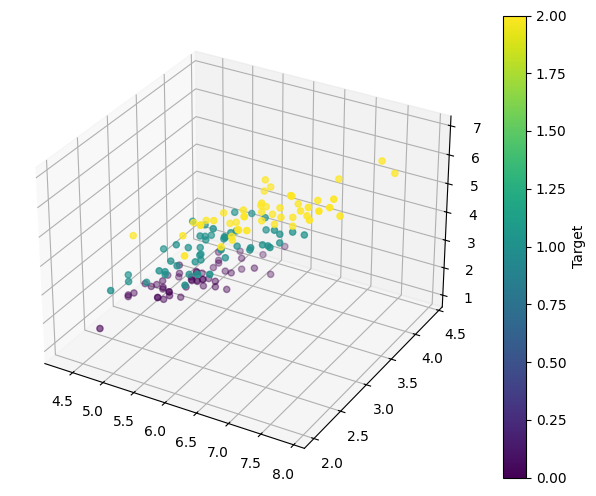

In [55]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],
    c=df['target'],
    cmap='viridis',
    marker='o'
)

plt.colorbar(sc, ax=ax, label='Target')

plt.show()


## PCA Algorithm from SMLH

In [56]:
class SMLH_PCA:
  def __init__(self, n_components = 2, method = 'svd'):
    self.n_components = n_components
    if method in ['svd', 'eigen']:
      self.__method = method
    else:
      raise ValueError(f"'{method}' is not a method implemented in this model")

  def fit(self, X):
    if self.__method == 'svd':
      U, S, V = np.linalg.svd(X)
      self.V = V[:self.n_components, :]
    elif self.__method == 'eigen':
      corr_matrix = np.corrcoef(X.T)
      self.eig_vals, self.eig_vecs = np.linalg.eig(corr_matrix)
      self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
      self.eig_pairs.sort(key=lambda a: a[0], reverse=True)
      total = np.sum(self.eig_vals)
      self.explained_variance_ratio = [i/total*100 for i in sorted(self.eig_vals, reverse=True)]
      # self.matrix_w = np.hstack(self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.n_components))
      self.matrix_w = np.column_stack([self.eig_pairs[i][1] for i in range(self.n_components)])
    return self

  def transform(self, X):
    if self.__method == 'svd':
      return X.dot(self.V)
    elif self.__method == 'eigen':
      return X.dot(self.matrix_w)

## Scaling the data

In [57]:
std_scaler = StandardScaler()
ds_iris.data = std_scaler.fit_transform(ds_iris.data)

## Train PCA

In [58]:
pca1 = SMLH_PCA(2, 'eigen')
pca1.fit(ds_iris.data)
ds1 = pca1.transform(ds_iris.data)

In [59]:
pca2 = SMLH_PCA(2, 'svd')
pca2.fit(ds_iris.data)
ds2 = pca1.transform(ds_iris.data)

In [60]:
pca3 = PCA(n_components=2)
pca3.fit(ds_iris.data)
ds3 = pca3.transform(ds_iris.data)

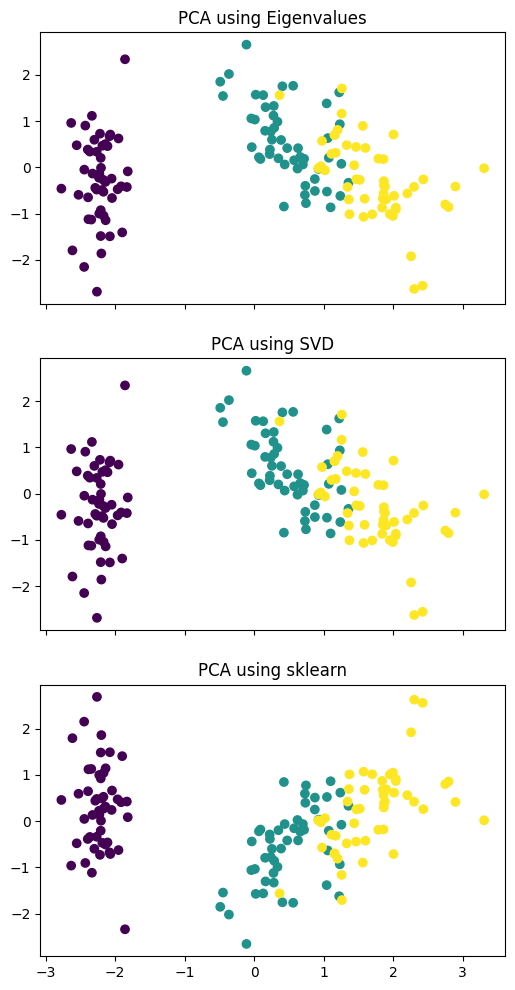

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

axs[0].set_title("PCA using Eigenvalues")
axs[0].scatter(ds1[:, 0], ds1[:, 1], c=ds_iris.target)

axs[1].set_title("PCA using SVD")
axs[1].scatter(ds2[:, 0], ds2[:, 1], c=ds_iris.target)

axs[2].set_title("PCA using sklearn")
axs[2].scatter(ds3[:, 0], ds3[:, 1], c=ds_iris.target)

plt.show()

The result of the from-scratch implementation is flipped horizontally. Google and GPT said it is normal, andd it happens due to reversed sign. The class separation is preserved.

The result of all three plots is exactly (almost) the same.

Clusters observed in the 3D scatter plot are also reflected in the 2D PCA projections. Overall, the separation zones have become clearer.

By comparing the results of the three PCA implementations and the corresponding 3D scatter plot, it is visible that all three algorithms capture the same underlying structure of the data.

Although the visual orientations of the projections differ slightly; they arise due to minor numerical and implementation differences between methods.

So, different PCA algorithms are mathematically equivalent approaches to dimensionality reduction.

## Single Component

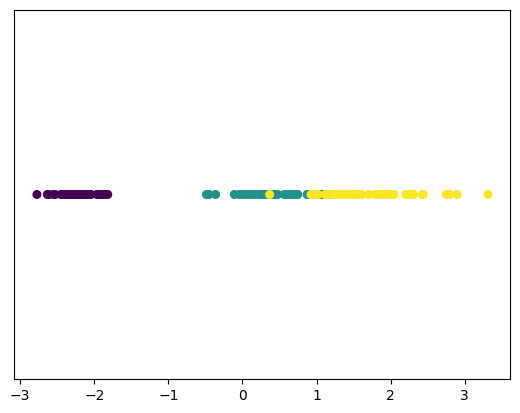

In [62]:
pca4 = PCA(n_components=1)
ds4 = pca4.fit_transform(ds_iris.data)

plt.scatter(
    ds4,
    np.zeros_like(ds4),
    c=ds_iris.target,
    cmap='viridis',
    s=30
)

plt.yticks([])
plt.show()

The same as from reduction of 4 -> 2 features, the remaining 1 also captures the same clusters.

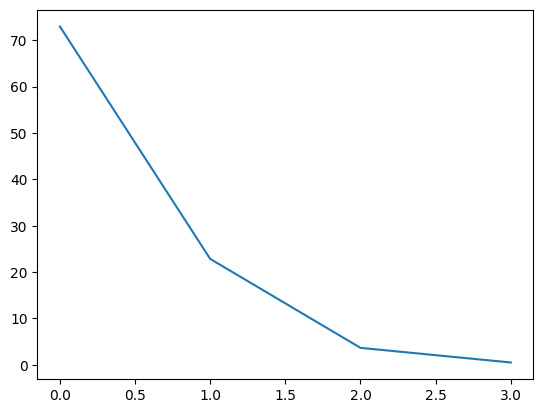

In [63]:
plt.plot(pca1.explained_variance_ratio)
plt.show()

From the Explained Variance Ratio plot, we can observe how much information each principal component captures from the original data. The first principal component explains more than 70% of the total variance, making it the most important component. The second principal component still contributes a significant amount of information, capturing approximately 24% of the variance.

In contrast, the third and fourth principal components each explain less than 5% of the variance, indicating that they contribute very little additional information and can be considered largely redundant. Therefore, most of the variability in the data can be effectively represented using only the first two principal components.

# Subtask 2

## Loading Dataset

In [64]:
ds_digs = load_digits()

In [65]:
ds_digs.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [66]:
ds_digs.data.shape

(1797, 64)

## Plotting random digits

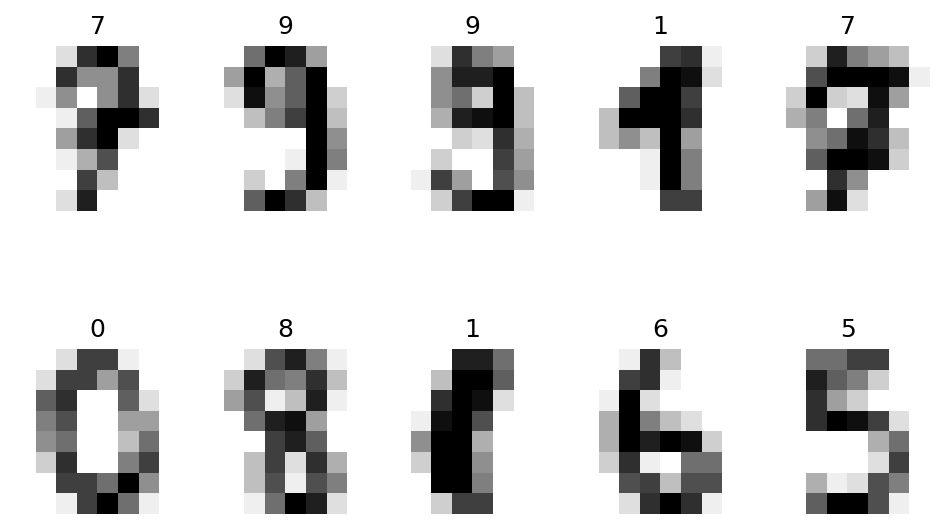

In [67]:
fig, axs = plt.subplots(2, 5, dpi=150)

indices = np.random.choice(len(ds_digs.data), size=10, replace=False)

for ax, i in zip(axs.flat, indices):
    ax.imshow(ds_digs.data[i].reshape(8,8), cmap="binary")
    ax.set_title(ds_digs.target[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

## Sklearn PCA instance

In [68]:
pca = PCA(n_components=2)

## Scaling the Dataset

In [69]:
std_scaler = StandardScaler()
ds_digs.data = std_scaler.fit_transform(ds_digs.data)

## Training PCA

In [70]:
ds = pca.fit_transform(ds_digs.data)

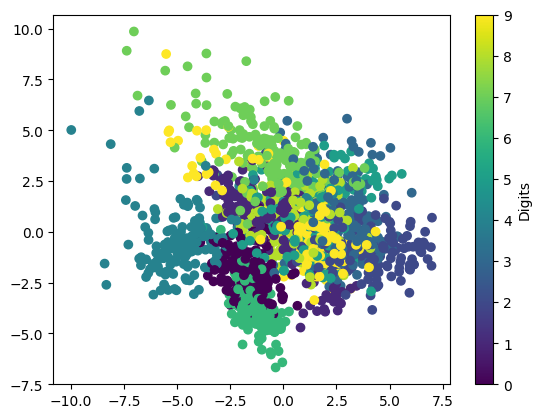

In [71]:
sc = plt.scatter(ds[:, 0], ds[:, 1], c=ds_digs.target)
plt.colorbar(sc, label='Digits')

plt.show()

After reducing the dimensionality to 2, we see some clusters, but they are not really clear, as multiple differently-colored points lay in the same place.

The plot shows that PCA preserves variance rather than class separability and that two components are insufficient for clear class distinction.

In [78]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

As we see, these dimensions capture only ~21% of the variance. Actually, it is not bad, because if we had all 64, we'd preserve all the information, but it would make visualization impractical and would not necessarily reveal meaningful structure. PCA reduces the dimensionality by projecting the data onto directions of maximum variance, providing a compact representation that highlights the most important patterns, even if some discriminative information is lost.

## 3 Dimensions
(out of  the interest)

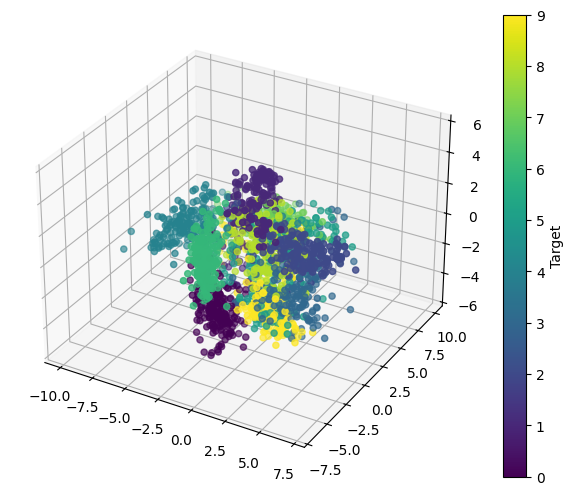

In [72]:
pcax = PCA(n_components=3)
dsax = pcax.fit_transform(ds_digs.data)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    dsax[:, 0], dsax[:, 1], dsax[:, 2],
    c=ds_digs.target,
    cmap='viridis',
    marker='o'
)

plt.colorbar(sc, ax=ax, label='Target')

plt.show()

In three dimensions the separation looks way clearer - that shows that our assumption about 2 dimensions being insufficient was correct.

In [76]:
pcax.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415])

Now, about ~29% of variance is captured.